<h1>Titanic Survival Prediction</h1>

In [1]:
import warnings 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
warnings.filterwarnings('ignore') 

In [2]:
dataset=pd.read_csv("Titanic.csv")
dataset.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [3]:
testdata=pd.read_csv("test.csv")
testdata.head(4)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S


In [4]:
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<h3>Visualization</h3>

In [6]:
dataset["Sex"].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

Text(0, 0.5, '')

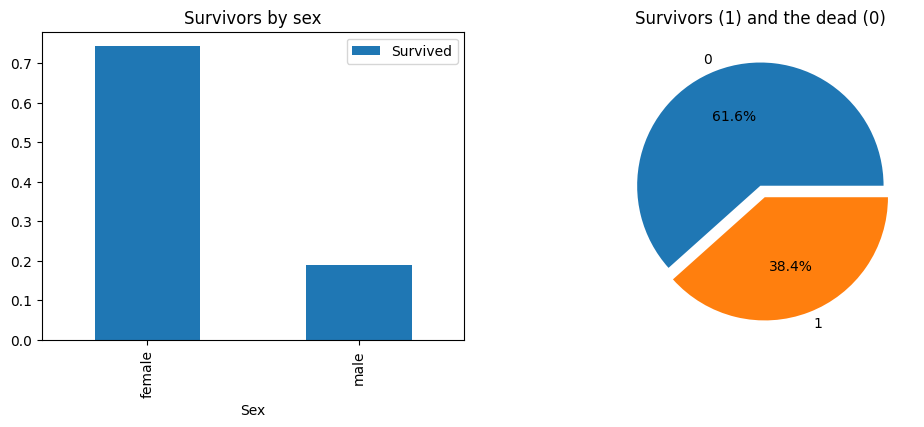

In [7]:
f, ax = plt.subplots(1, 2, figsize=(12, 4)) 
dataset[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0]) 
ax[0].set_title('Survivors by sex')
dataset['Survived'].value_counts().plot.pie( 
    explode=[0, 0.1], autopct='%1.1f%%', ax=ax[1], shadow=False) 
ax[1].set_title('Survivors (1) and the dead (0)') 
ax[1].set_ylabel('') 

<h3>Droping and Filling of Blank columns</h3>

In [8]:
dataset["CabinBool"]=(dataset["Cabin"].notnull().astype("int64"))
testdata["CabinBool"]=(dataset["Cabin"].notnull().astype("int64"))
dataset.drop(columns=["Cabin","Ticket","Fare"],inplace=True)
testdata.drop(columns=["Cabin","Ticket","Fare"],inplace=True)

In [9]:
dataset["Age"].value_counts()

Age
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: count, Length: 88, dtype: int64

In [10]:
# Converting ages into age groups
dataset["Age"]=dataset["Age"].fillna(-0.5)
bins = [-1, 0, 5, 12, 18, 24, 35, 60, np.inf] 
labels = ['Unknown', 'Baby', 'Child', 'Teenager', 
          'Student', 'Young Adult', 'Adult', 'Senior'] 
dataset['AgeGroup'] = pd.cut(dataset["Age"], bins, labels=labels) 
dataset.drop(columns=["Age"],inplace=True)

testdata['AgeGroup'] = pd.cut(testdata["Age"], bins, labels=labels) 
testdata.drop(columns=["Age"],inplace=True)

In [11]:
dataset["Embarked"]=dataset["Embarked"].fillna("S")
testdata["Embarked"]=testdata["Embarked"].fillna("S")

In [12]:
map_sex={"male":1,"female":0}
map_Embarked={"S":1,"C":1,"Q":2}
map_Age_group={'Unknown':0, 'Baby':1, 'Child':2, 'Teenager':3, 
          'Student':4, 'Young Adult':5, 'Adult':6, 'Senior':7}
dataset["Sex"]=dataset["Sex"].map(map_sex)
dataset["Embarked"]=dataset["Embarked"].map(map_Embarked)
dataset["AgeGroup"]=dataset["AgeGroup"].map(map_Age_group)

testdata["Sex"]=testdata["Sex"].map(map_sex)
testdata["Embarked"]=testdata["Embarked"].map(map_Embarked)
testdata["AgeGroup"]=testdata["AgeGroup"].map(map_Age_group)

In [13]:
dataset.head(3)

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Embarked,CabinBool,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",1,1,0,1,0,4
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,1,1,6
2,3,1,3,"Heikkinen, Miss. Laina",0,0,0,1,0,5


<h3>Corelations</h3>

In [14]:
dataset[["Survived","Pclass","Sex","Embarked","CabinBool","SibSp","Parch"]].corr()

,Survived,Pclass,Sex,Embarked,CabinBool,SibSp,Parch
Survived,1.000000,-0.338481,-0.543351,0.003650,0.316912,-0.035322,0.081629
Pclass,-0.338481,1.000000,0.131900,0.221009,-0.725541,0.083081,0.018443
Sex,-0.543351,0.131900,1.000000,-0.074115,-0.140391,-0.114631,-0.245489
Embarked,0.003650,0.221009,-0.074115,1.000000,-0.129572,-0.026354,-0.081228
CabinBool,0.316912,-0.725541,-0.140391,-0.129572,1.000000,-0.040460,0.036987
SibSp,-0.035322,0.083081,-0.114631,-0.026354,-0.040460,1.000000,0.414838
Parch,0.081629,0.018443,-0.245489,-0.081228,0.036987,0.414838,1.000000


In [15]:
x=dataset.drop(["Survived","PassengerId","Name","CabinBool"],axis=1)
y=dataset["Survived"]

<h3>Model Tarining</h3>

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42) 

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score
model= DecisionTreeClassifier(max_depth=5)
model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [19]:
acc=model.score(x_test,y_test)*100 

In [20]:
prd=model.predict(x_test)
cd=confusion_matrix(y_test,prd)

<Axes: >

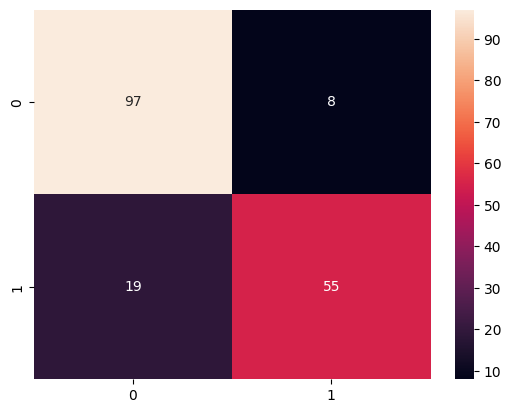

In [21]:
sns.heatmap(cd,annot=True)

In [22]:
print("Precision score:",precision_score(y_test,prd)*100)
print("Recall score:",recall_score(y_test,prd)*100)
print("F1 Score:",f1_score(y_test,prd)*100)


Precision score: 87.3015873015873
Recall score: 74.32432432432432
F1 Score: 80.2919708029197


In [23]:
# To check the best Value of Max Depth
for i in range(1,10):
    rf2=DecisionTreeClassifier(max_depth=i)
    rf2.fit(x_train,y_train)
    train=rf2.score(x_train,y_train)*100
    test=rf2.score(x_test,y_test)*100
    print(f"train={train} ,test={test} diff={train-test},{i}")

train=78.79213483146067 ,test=78.2122905027933 diff=0.5798443286673773,1
train=79.21348314606742 ,test=76.53631284916202 diff=2.677170296905402,2
train=81.03932584269663 ,test=78.2122905027933 diff=2.8270353399033326,3
train=82.16292134831461 ,test=79.3296089385475 diff=2.8333124097671174,4
train=84.5505617977528 ,test=84.91620111731844 diff=-0.36563931956563067,5
train=85.25280898876404 ,test=83.24022346368714 diff=2.0125855250769007,6
train=85.95505617977528 ,test=83.79888268156425 diff=2.1561734982110323,7
train=86.51685393258427 ,test=83.79888268156425 diff=2.7179712510200176,8
train=86.79775280898876 ,test=83.79888268156425 diff=2.99887012742451,9


In [24]:
print("So The accuracy will be ",acc)

So The accuracy will be  84.91620111731844


<h3>Testing</h3>

In [26]:
pass_id=testdata["PassengerId"]
name=testdata["Name"]
id = testdata.drop(["PassengerId","Name","CabinBool"],axis=1)
predictions = model.predict(id) 

output = pd.DataFrame({"PassengerId": pass_id, "Survived": predictions,"Name":name}) 
output.to_csv("resultfile.csv", index=False) 